## Data

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
train_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = True)

In [3]:
len(train_dataset)

60000

In [4]:
test_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = False)

In [5]:
len(test_dataset)

10000

### Data Visualization

In [6]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x13E459DC0>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

label 5


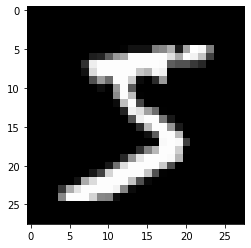

In [8]:
image, label = train_dataset[0]
plt.imshow(image, cmap='gray')
print('label', label)

label 7


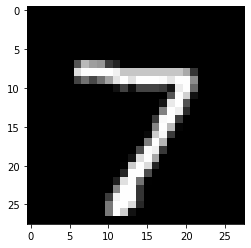

In [9]:
image, label = test_dataset[0]
plt.imshow(image, cmap='gray')
print('label', label)

### Transforming data

In [10]:
from torchvision.transforms import transforms

In [11]:
train_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = True,
                     transform = transforms.ToTensor())

In [138]:
test_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = False,transform = transforms.ToTensor())

In [16]:
image_tensor, label = train_dataset[0]
image_tensor.shape, label

(torch.Size([1, 28, 28]), 5)

In [18]:
print(image_tensor[0,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


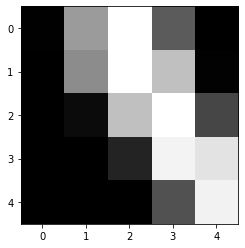

In [19]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');

### Splitting data

In [20]:
from torch.utils.data import random_split

In [25]:
len(train_dataset)-(len(train_dataset)*split)

9000.0

In [26]:
split = 0.85
train_ds, valid_ds = random_split(train_dataset, [50000, 10000])
len(train_ds), len(valid_ds)

(50000, 10000)

### Dataloader

In [27]:
from torch.utils.data import DataLoader

In [28]:
train_dl = DataLoader(train_ds, batch_size = 128, shuffle = True)
valid_dl = DataLoader(valid_ds, batch_size = 128)

In [30]:
# for xb, yb in train_dl:
#     print(xb)
#     print(yb)
#     break

### Model Creation

In [32]:
import torch.nn as nn

In [33]:
input_size = 1*28*28
num_classes = 10

model = nn.Linear(in_features=input_size, out_features=num_classes)

In [34]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-0.0116,  0.0019, -0.0348,  ...,  0.0166,  0.0330, -0.0103],
                      [-0.0081, -0.0286, -0.0311,  ..., -0.0021,  0.0269,  0.0262],
                      [ 0.0188, -0.0058,  0.0325,  ..., -0.0191, -0.0318, -0.0240],
                      ...,
                      [ 0.0230,  0.0219,  0.0336,  ...,  0.0149, -0.0018, -0.0292],
                      [ 0.0142,  0.0225,  0.0060,  ...,  0.0342, -0.0331, -0.0097],
                      [-0.0029,  0.0199,  0.0060,  ...,  0.0179, -0.0207,  0.0067]])),
             ('bias',
              tensor([-0.0150, -0.0208, -0.0129,  0.0345, -0.0225, -0.0067, -0.0272,  0.0215,
                       0.0346,  0.0293]))])

In [36]:
model.weight.shape, model.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [140]:
for image, label in train_dl:
    print(image.shape)
    print(label.dtype)
    break

torch.Size([128, 1, 28, 28])
torch.int64


In [38]:
image.reshape(128,784).shape

torch.Size([128, 784])

### Custom model

In [39]:
class Mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

In [40]:
model = Mnist_model()

In [41]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0335, -0.0236,  0.0034,  ...,  0.0177, -0.0074,  0.0213],
                      [-0.0288, -0.0139,  0.0244,  ..., -0.0111,  0.0295,  0.0225],
                      [ 0.0033,  0.0108,  0.0134,  ..., -0.0055,  0.0047, -0.0016],
                      ...,
                      [-0.0142, -0.0146,  0.0173,  ...,  0.0141,  0.0215,  0.0143],
                      [ 0.0071,  0.0134,  0.0181,  ...,  0.0133,  0.0004,  0.0024],
                      [-0.0280,  0.0205,  0.0113,  ...,  0.0191,  0.0272,  0.0169]])),
             ('linear.bias',
              tensor([ 0.0059,  0.0188, -0.0157, -0.0166,  0.0263,  0.0054, -0.0317, -0.0221,
                      -0.0254,  0.0032]))])

In [42]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [43]:
model.linear.weight.shape, model.linear.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

### example test

In [65]:
for images, labels in train_dl:
    print(images.shape)
    out = model(images)
    print(out.shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


In [66]:
import torch.nn.functional as F

In [67]:
### output logits
logits = F.softmax(out, dim=1)
logits, logits.shape

(tensor([[0.1234, 0.0873, 0.0583,  ..., 0.1100, 0.1322, 0.1325],
         [0.1429, 0.0879, 0.0648,  ..., 0.1155, 0.1272, 0.1261],
         [0.1069, 0.0911, 0.0932,  ..., 0.1083, 0.0972, 0.1208],
         ...,
         [0.1005, 0.1002, 0.0700,  ..., 0.0919, 0.1292, 0.1362],
         [0.1225, 0.1061, 0.0922,  ..., 0.0966, 0.0907, 0.1165],
         [0.1108, 0.1072, 0.0723,  ..., 0.0892, 0.1119, 0.1242]],
        grad_fn=<SoftmaxBackward0>),
 torch.Size([128, 10]))

In [68]:
print('sample logits: ', logits[0].data)
print('sum', torch.sum(logits[0]).item())

sample logits:  tensor([0.1234, 0.0873, 0.0583, 0.1242, 0.0836, 0.0651, 0.0834, 0.1100, 0.1322,
        0.1325])
sum 1.0


`torch.max` returns each row's largest element and the corresponding index.

In [70]:
max_probs, preds = torch.max(logits, dim=1)
print(preds)
print(max_probs)
print(logits[0])

tensor([9, 0, 9, 9, 3, 6, 3, 3, 0, 9, 3, 7, 9, 7, 9, 3, 2, 6, 3, 9, 0, 3, 3, 3,
        9, 9, 3, 3, 9, 3, 3, 0, 3, 9, 9, 9, 3, 3, 4, 9, 0, 7, 6, 3, 9, 3, 9, 9,
        7, 9, 8, 7, 4, 9, 9, 0, 3, 9, 0, 9, 3, 9, 8, 9, 6, 0, 3, 9, 3, 9, 9, 3,
        3, 3, 9, 9, 9, 9, 9, 9, 9, 3, 0, 9, 0, 7, 3, 3, 4, 9, 9, 9, 3, 0, 8, 7,
        9, 9, 9, 0, 8, 0, 3, 0, 9, 6, 3, 8, 1, 3, 3, 9, 0, 6, 0, 9, 3, 9, 6, 9,
        9, 9, 3, 3, 9, 9, 0, 9])
tensor([0.1325, 0.1429, 0.1208, 0.1470, 0.1347, 0.1143, 0.1461, 0.1198, 0.1254,
        0.1527, 0.1337, 0.1362, 0.1256, 0.1286, 0.1236, 0.1437, 0.1497, 0.1266,
        0.1292, 0.1337, 0.1227, 0.1530, 0.1613, 0.1529, 0.1505, 0.1266, 0.1338,
        0.1276, 0.1222, 0.1362, 0.1248, 0.1386, 0.1350, 0.1349, 0.1386, 0.1188,
        0.1351, 0.1287, 0.1279, 0.1191, 0.1335, 0.1266, 0.1303, 0.1444, 0.1376,
        0.1419, 0.1427, 0.1352, 0.1259, 0.1299, 0.1333, 0.1285, 0.1137, 0.1214,
        0.1296, 0.1260, 0.1429, 0.1239, 0.1198, 0.1419, 0.1242, 0.1160, 0.1330,
       

In [71]:
### Output shape should be [10]
preds

tensor([9, 0, 9, 9, 3, 6, 3, 3, 0, 9, 3, 7, 9, 7, 9, 3, 2, 6, 3, 9, 0, 3, 3, 3,
        9, 9, 3, 3, 9, 3, 3, 0, 3, 9, 9, 9, 3, 3, 4, 9, 0, 7, 6, 3, 9, 3, 9, 9,
        7, 9, 8, 7, 4, 9, 9, 0, 3, 9, 0, 9, 3, 9, 8, 9, 6, 0, 3, 9, 3, 9, 9, 3,
        3, 3, 9, 9, 9, 9, 9, 9, 9, 3, 0, 9, 0, 7, 3, 3, 4, 9, 9, 9, 3, 0, 8, 7,
        9, 9, 9, 0, 8, 0, 3, 0, 9, 6, 3, 8, 1, 3, 3, 9, 0, 6, 0, 9, 3, 9, 6, 9,
        9, 9, 3, 3, 9, 9, 0, 9])

In [72]:
labels

tensor([5, 3, 1, 0, 4, 4, 5, 7, 5, 6, 5, 5, 6, 7, 7, 9, 0, 3, 4, 2, 1, 3, 6, 0,
        9, 4, 6, 9, 1, 7, 8, 2, 5, 3, 5, 5, 4, 7, 6, 5, 9, 1, 4, 0, 2, 0, 6, 9,
        0, 8, 1, 3, 6, 5, 6, 4, 3, 9, 5, 0, 1, 6, 9, 0, 5, 4, 3, 2, 2, 1, 4, 1,
        3, 0, 7, 6, 7, 6, 0, 9, 3, 0, 7, 3, 5, 1, 8, 4, 6, 0, 7, 0, 1, 5, 3, 2,
        9, 0, 9, 6, 9, 4, 6, 4, 9, 0, 5, 7, 1, 2, 8, 3, 8, 0, 1, 4, 7, 0, 5, 4,
        2, 2, 2, 1, 7, 5, 6, 6])

In [89]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [90]:
accuracy(logits, labels)

tensor(0.1016)

In [98]:
# loss_fn = nn.CrossEntropyLoss()
loss_fn = F.cross_entropy

In [99]:
loss = loss_fn(logits, labels)
loss

tensor(2.3014, grad_fn=<NllLossBackward0>)

### Custom Function and Final custom Model

In [112]:
def fit(epochs, lr, model, train_dl, valid_dl, opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr=lr)
    history = []
    
    for epoch in range(epochs):
        for batch in train_dl:
            model.train()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        model.eval()
        with torch.inference_mode():
            result = evaluate(model, valid_dl)
            model.epoch_end(epoch, result)
            history.append(result)
    return history

In [113]:
def evaluate(model, valid_dl):
    valid_pred = [model.validation_step(batch) for batch in valid_dl]
    return model.validation_epoch_end(valid_pred)

In [118]:
class Mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        logits = self(images)
        loss = F.cross_entropy(logits, labels)
        acc = accuracy(logits, labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        logits = self(images)
        loss = F.cross_entropy(logits,labels)
        acc = accuracy(logits, labels)
        return {'val_loss':loss, 'val_accuracy': acc}
    
    def validation_epoch_end(self, valid_pred):
        batch_losses = [x['val_loss'] for x in valid_pred]
        valid_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_accuracy'] for x in valid_pred]
        valid_acc = torch.stack(batch_accs).mean()
        return {'valid_loss': valid_loss.item(), 'valid_accuracy': valid_acc}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}] | valid_loss: {:.4f} | valid_acc: {:.4f}".format(epoch, result['valid_loss'], result['valid_accuracy']))

In [132]:
model = Mnist_model()

In [133]:
result0 = evaluate(model, valid_dl)
result0

{'valid_loss': 2.362468957901001, 'valid_accuracy': tensor(0.0395)}

In [134]:
history1 = fit(5, 0.001, model, train_dl, valid_dl)

Epoch [0] | valid_loss: 1.9767 | valid_acc: 0.6276
Epoch [1] | valid_loss: 1.6962 | valid_acc: 0.7453
Epoch [2] | valid_loss: 1.4877 | valid_acc: 0.7798
Epoch [3] | valid_loss: 1.3309 | valid_acc: 0.7937
Epoch [4] | valid_loss: 1.2109 | valid_acc: 0.8047


In [135]:
history2 = fit(15, 0.001, model, train_dl, valid_dl)

Epoch [0] | valid_loss: 1.1169 | valid_acc: 0.8133
Epoch [1] | valid_loss: 1.0417 | valid_acc: 0.8203
Epoch [2] | valid_loss: 0.9804 | valid_acc: 0.8259
Epoch [3] | valid_loss: 0.9296 | valid_acc: 0.8307
Epoch [4] | valid_loss: 0.8866 | valid_acc: 0.8349
Epoch [5] | valid_loss: 0.8500 | valid_acc: 0.8387
Epoch [6] | valid_loss: 0.8183 | valid_acc: 0.8413
Epoch [7] | valid_loss: 0.7905 | valid_acc: 0.8448
Epoch [8] | valid_loss: 0.7661 | valid_acc: 0.8470
Epoch [9] | valid_loss: 0.7443 | valid_acc: 0.8496
Epoch [10] | valid_loss: 0.7248 | valid_acc: 0.8509
Epoch [11] | valid_loss: 0.7073 | valid_acc: 0.8521
Epoch [12] | valid_loss: 0.6914 | valid_acc: 0.8539
Epoch [13] | valid_loss: 0.6768 | valid_acc: 0.8555
Epoch [14] | valid_loss: 0.6635 | valid_acc: 0.8572


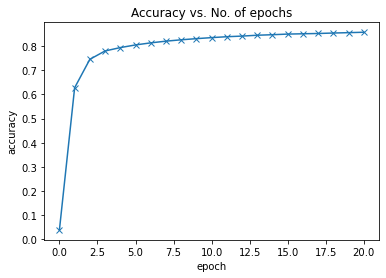

In [136]:
history = [result0] + history1 + history2
accuracies = [result['valid_accuracy'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [139]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'valid_loss': 0.6392986178398132, 'valid_accuracy': tensor(0.8626)}